In [ ]:
!pip install kaggle

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# **Canny Edge Detection**

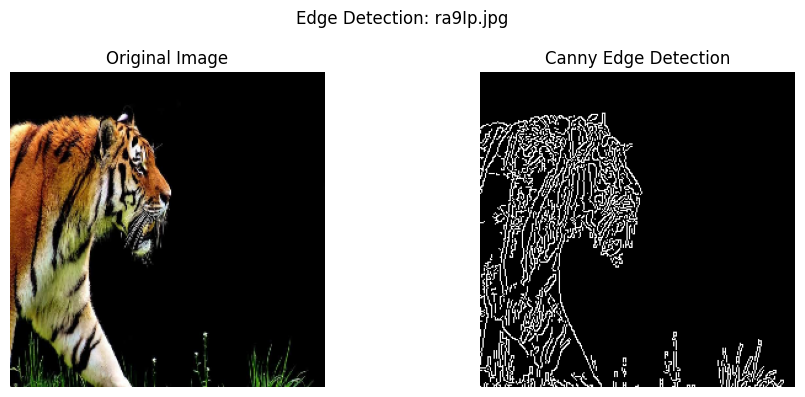

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/input_image-1.jpg"
image = cv2.imread(img_path)
image = cv2.resize(image, (256, 256))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.suptitle("Edge Detection: ra9Ip.jpg", fontsize=12)
plt.tight_layout()
plt.show()

# **Harris Corner Detection**



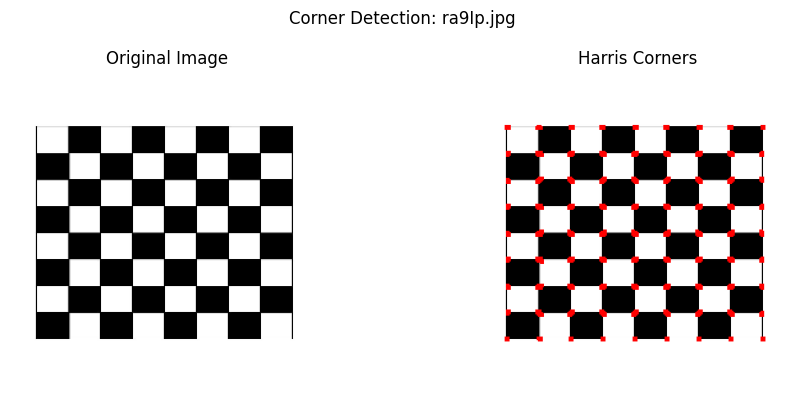

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/499b833512fe5244c140e9490b07b4f6.jpg"
image = cv2.imread(img_path)
image = cv2.resize(image, (256, 256))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
image_with_corners = image.copy()
image_with_corners[dst > 0.01 * dst.max()] = [0, 0, 255]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title("Harris Corners")
plt.axis("off")
plt.suptitle("Corner Detection: ra9Ip.jpg", fontsize=12)
plt.tight_layout()
plt.show()


# **Shape Detection**

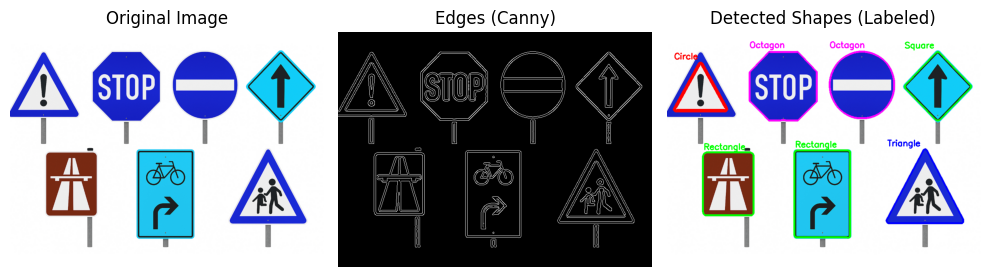

In [ ]:
img = cv2.imread("/content/785e2b17-ac3e-4a14-b747-313ba61d7156.jpg")
img = cv2.resize(img, (800, 600))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)

thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 5)

edges = cv2.Canny(thresh, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = img.copy()

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000:
        continue
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.03 * peri, True)
    x, y, w, h = cv2.boundingRect(approx)

    if len(approx) == 3:
        shape = "Triangle"
        color = (0, 0, 255)  # Red
    elif len(approx) == 4:
        ar = w / float(h)
        shape = "Square" if 0.9 <= ar <= 1.1 else "Rectangle"
        color = (0, 255, 0)  # Green
    elif len(approx) == 8:
        shape = "Octagon"
        color = (255, 0, 255)  # Purple
    else:
        shape = "Circle"
        color = (255, 0, 0)  # Blue
    cv2.drawContours(output, [cnt], -1, color, 3)
    cv2.putText(output, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                0.7, color, 2)
fig, axes = plt.subplots(1, 3, figsize=(10, 7))

axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(edges, cmap="gray")
axes[1].set_title("Edges (Canny)")
axes[1].axis("off")
axes[2].imshow(output)
axes[2].set_title("Detected Shapes (Labeled)")
axes[2].axis("off")
plt.tight_layout()
plt.show()

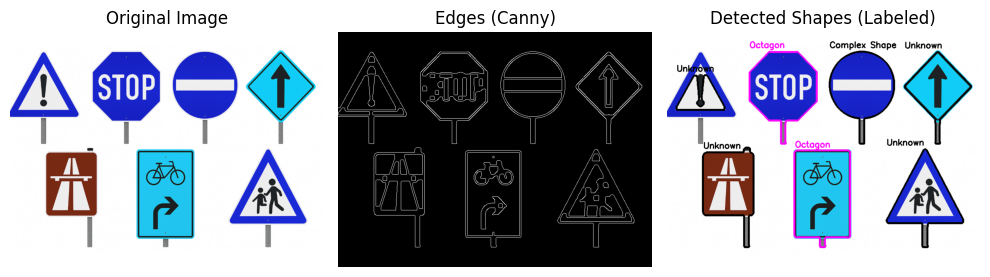

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded image
# NOTE: Using a placeholder path for demonstration. Replace with your actual path.
try:
    img = cv2.imread("image_ee78a7.png")
    if img is None:
        img = cv2.imread("/content/785e2b17-ac3e-4a14-b747-313ba61d7156.jpg")
except:
    img = np.zeros((600, 800, 3), dtype=np.uint8)

# Resize for easier visualization
img = cv2.resize(img, (800, 600))

# --------------------------------
# STEP 1: Preprocessing
# --------------------------------
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)

# Adaptive threshold helps under varying lighting
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 5)

# Adding Morphological Closing to connect broken edges (helps with dark signs)
kernel = np.ones((5, 5), np.uint8)
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

edges = cv2.Canny(closed, 50, 150)

# --------------------------------
# STEP 2: Contour Detection
# --------------------------------
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = img.copy()

for cnt in contours:
    area = cv2.contourArea(cnt)
    # Refinement 1: Increased Area Threshold to filter out noise like posts and internal text
    if area < 5000:
        continue

    peri = cv2.arcLength(cnt, True)
    # Refinement 2: Decreased approximation factor slightly (0.025 instead of 0.03)
    # to get a more accurate vertex count for complex shapes like octagons/circles.
    approx = cv2.approxPolyDP(cnt, 0.025 * peri, True)

    x, y, w, h = cv2.boundingRect(approx)
    num_vertices = len(approx)

    # Identify shape
    shape = "Unknown"
    color = (0, 0, 0) # Black default

    if num_vertices == 3:
        shape = "Triangle"
        color = (0, 0, 255)  # Red
    elif num_vertices == 4:
        ar = w / float(h)
        # Check for Square/Rectangle/Diamond
        if 0.8 <= ar <= 1.2:
            # A rotated square (Diamond) will also have num_vertices == 4 and ar close to 1
            shape = "Square"
        else:
            shape = "Rectangle"
        color = (0, 255, 0)  # Green
    elif num_vertices >= 7 and num_vertices <= 9:
        # Octagons often approximate to 7-9 vertices
        shape = "Octagon"
        color = (255, 0, 255)  # Purple
    else:
        # Refinement 3: Robust Circle Check
        # If the number of vertices is high (e.g., > 9), it's likely a circle.
        if num_vertices > 9:
            # Additionally, check the circularity by comparing the area to the bounding box area
            rect_area = w * h
            extent = area / rect_area
            if extent > 0.7: # High extent (area fills most of the bounding box)
                shape = "Circle"
                color = (255, 0, 0)  # Blue
            else:
                 shape = "Complex Shape" # Fallback for odd shapes

    # Draw contour and label
    cv2.drawContours(output, [cnt], -1, color, 3)
    cv2.putText(output, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                0.7, color, 2)

# --------------------------------
# STEP 3: Show Result
# --------------------------------
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Assuming you would display the result as before
# ... (Plotting code remains the same)
fig, axes = plt.subplots(1, 3, figsize=(10, 7))

axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(edges, cmap="gray")
axes[1].set_title("Edges (Canny)")
axes[1].axis("off")

axes[2].imshow(output)
axes[2].set_title("Detected Shapes (Labeled)")
axes[2].axis("off")

plt.tight_layout()
plt.show()